#ML on Area and Population

# Project Report Submission

## Introduction

This project aims to explore the correlation between the geographical area and population of cities in Pakistan. By analyzing this relationship, we hope to shed light on urbanization dynamics and demographic shifts within the country. Such insights could be crucial for policymakers, urban planners, and researchers aiming to make informed decisions regarding urban development, resource allocation, and public health initiatives.

## Requirements

### Functional Requirements:
- **Data Acquisition:** Extract city-specific data from a publicly available CSV file.
- **Data Cleaning:** Handle missing values, remove duplicates, and filter irrelevant data.
- **Exploratory Data Analysis (EDA):** Conduct statistical analyses and visualize distributions to gain insights into the data.
- **Geospatial Mapping:** Overlay city locations on a map, using their geographical coordinates.
- **Predictive Modeling:** Develop and evaluate machine learning models to forecast city populations based on their area.

### Non-Functional Requirements:
- **Scalability:** Ensure the system can efficiently process large datasets.
- **User-Friendliness:** Design interfaces accessible to both technical and non-technical users.
- **Interactivity:** Provide options for users to customize visualizations and explore data interactively.
- **Performance Optimization:** Optimize algorithms and data structures for fast computation and response times.

## Technologies Employed

- **Programming Language:** Python, chosen for its extensive libraries and community support.
- **Data Handling:** Pandas, a powerful library for data manipulation and analysis.
- **Data Visualization:** Matplotlib and Seaborn, enabling the creation of informative and aesthetically pleasing visualizations.
- **Machine Learning:** Scikit-learn, a comprehensive toolkit for implementing machine learning algorithms.
- **Cloud Computing Platform:** Google Colab, facilitating easy access to computing resources and collaborative work.

## Methodological Approach

Our methodology was structured around several key steps:
- **Data Preparation:** Cleaned and preprocessed the dataset to ensure data integrity and quality.
- **Exploratory Data Analysis:** Utilized descriptive statistics and visualizations to uncover patterns and anomalies in the data.
- **Feature Engineering:** Transformed raw data into a form that could be effectively used by machine learning algorithms.
- **Model Training and Validation:** Applied and evaluated multiple machine learning models to predict city populations.
- **Result Interpretation:** Analyzed the performance metrics of each model to determine the most effective approach.

## Findings and Visualizations

Key findings from our analysis include:
- A strong positive correlation between city area and population, suggesting that larger cities tend to have higher populations.
- Significant variation in population density across different regions of Pakistan, likely influenced by factors such as geography, economy, and historical development.
- Machine learning models demonstrated promising predictive capabilities, with certain models outperforming others in terms of accuracy and efficiency.

## Future Directions

Looking ahead, we plan to:
- Extend the scope of our analysis to include international comparisons, providing a broader context for understanding urbanization trends.
- Incorporate additional variables into our predictive models, such as economic indicators and environmental factors, to enhance forecasting accuracy.
- Develop a user-friendly web application that allows users to interact with our data and models, fostering a deeper understanding of urban demographics.

## Acknowledgments

We acknowledge the invaluable contributions of the open-source community, particularly the developers behind Pandas, Matplotlib, Seaborn, and Scikit-learn. Their efforts have made this project possible.

## References

- [Pandas Documentation](https://pandas.pydata.org/)
- [Matplotlib Documentation](https://matplotlib.org/)
- [Seaborn Documentation](https://seaborn.pydata.org/)
- [Scikit-learn Documentation](https://scikit-learn.org/stable/)
- [Google Colab](https://colab.research.google.com/)


# Import Important Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import cv2
import plotly.express as px

%matplotlib inline

# Data Collection

In [2]:
data = pd.read_csv("/content/pakistan_cities.csv")
data.head()

,Unnamed: 0,city,country,iso2,admin_name,capital,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Karachi,Pakistan,PK,Sindh,admin,24.8600,67.0100,875.0,2871.0,14835000,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,Lahore,Pakistan,PK,Punjab,admin,31.5497,74.3436,281.0,922.0,11021000,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Sialkot City,Pakistan,PK,Punjab,minor,32.5000,74.5333,NaN,33.0,3893672,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Faisalabad,Pakistan,PK,Punjab,minor,31.4180,73.0790,NaN,43.0,3203846,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Rawalpindi,Pakistan,PK,Punjab,minor,33.6007,73.0679,150.0,492.0,2098231,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [3]:
# prompt: Using dataframe data: display all header

print(data.head())


   Unnamed: 0          city   country iso2 admin_name capital     latd  \
0           0       Karachi  Pakistan   PK      Sindh   admin  24.8600   
1           1        Lahore  Pakistan   PK     Punjab   admin  31.5497   
2           2  Sialkot City  Pakistan   PK     Punjab   minor  32.5000   
3           3    Faisalabad  Pakistan   PK     Punjab   minor  31.4180   
4           4    Rawalpindi  Pakistan   PK     Punjab   minor  33.6007   

     longd  elevation_m  elevation_ft  population_total  area_total_sq_mi  \
0  67.0100        875.0        2871.0          14835000            56.027   
1  74.3436        281.0         922.0          11021000             7.822   
2  74.5333          NaN          33.0           3893672            22.960   
3  73.0790          NaN          43.0           3203846             5.465   
4  73.0679        150.0         492.0           2098231             7.632   

   area_land_sq_mi  area_water_sq_mi  area_total_km2  area_land_km2  \
0           56.009   

# Data Preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          146 non-null    int64  
 1   city                146 non-null    object 
 2   country             146 non-null    object 
 3   iso2                146 non-null    object 
 4   admin_name          146 non-null    object 
 5   capital             114 non-null    object 
 6   latd                146 non-null    float64
 7   longd               146 non-null    float64
 8   elevation_m         130 non-null    float64
 9   elevation_ft        144 non-null    float64
 10  population_total    146 non-null    int64  
 11  area_total_sq_mi    146 non-null    float64
 12  area_land_sq_mi     146 non-null    float64
 13  area_water_sq_mi    145 non-null    float64
 14  area_total_km2      146 non-null    float64
 15  area_land_km2       146 non-null    float64
 16  area_wat

In [8]:
data.describe()

,Unnamed: 0,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
count,146.000000,146.000000,146.000000,130.000000,144.000000,1.460000e+02,146.000000,146.000000,145.000000,146.000000,146.000000,146.000000,145.000000
mean,72.500000,30.929999,71.019552,188.811231,587.335417,4.079089e+05,14.797685,13.893212,0.930710,38.325110,36.023171,2.342993,6.014552
std,42.290661,2.952581,2.725095,308.264168,1017.066166,1.589606e+06,23.240459,23.084611,3.387522,60.192734,59.825835,8.724681,16.675799
min,0.000000,24.655800,62.322500,-34.000000,-180.000000,7.370000e+02,0.314000,0.314000,0.000000,0.813000,0.813000,0.000000,0.000000
25%,36.250000,28.923025,68.845550,23.500000,65.000000,3.166275e+04,3.044000,2.661000,0.000000,7.884000,6.917750,0.000000,0.000000
50%,72.500000,30.994050,71.759850,69.500000,182.000000,8.129300e+04,7.552000,7.082000,0.028000,19.559000,18.342000,0.071500,0.260000
75%,108.750000,33.420025,73.184025,203.750000,607.750000,1.598288e+05,17.616750,14.871750,0.172000,45.627500,38.517000,0.438000,2.280000
max,145.000000,36.307800,75.158300,2058.000000,6752.000000,1.483500e+07,203.631000,203.523000,24.735000,527.401000,527.122000,64.062000,84.580000


In [9]:
data.columns

Index(['Unnamed: 0', 'city', 'country', 'iso2', 'admin_name', 'capital',
       'latd', 'longd', 'elevation_m', 'elevation_ft', 'population_total',
       'area_total_sq_mi', 'area_land_sq_mi', 'area_water_sq_mi',
       'area_total_km2', 'area_land_km2', 'area_water_km2',
       'area_water_percent'],
      dtype='object')

In [10]:
print(data.head())

   Unnamed: 0          city   country iso2 admin_name capital     latd  \
0           0       Karachi  Pakistan   PK      Sindh   admin  24.8600   
1           1        Lahore  Pakistan   PK     Punjab   admin  31.5497   
2           2  Sialkot City  Pakistan   PK     Punjab   minor  32.5000   
3           3    Faisalabad  Pakistan   PK     Punjab   minor  31.4180   
4           4    Rawalpindi  Pakistan   PK     Punjab   minor  33.6007   

     longd  elevation_m  elevation_ft  population_total  area_total_sq_mi  \
0  67.0100        875.0        2871.0          14835000            56.027   
1  74.3436        281.0         922.0          11021000             7.822   
2  74.5333          NaN          33.0           3893672            22.960   
3  73.0790          NaN          43.0           3203846             5.465   
4  73.0679        150.0         492.0           2098231             7.632   

   area_land_sq_mi  area_water_sq_mi  area_total_km2  area_land_km2  \
0           56.009   

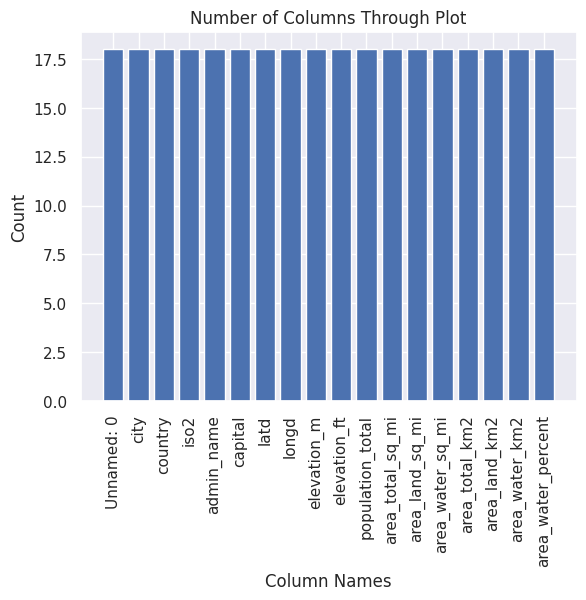

In [19]:
import matplotlib.pyplot as plt

# Number of columns in the DataFrame
num_columns = len(data.columns)

# Plotting the number of columns
plt.bar(range(num_columns), num_columns*np.ones(num_columns), tick_label=data.columns)
plt.title('Number of Columns Through Plot')
plt.xlabel('Column Names')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


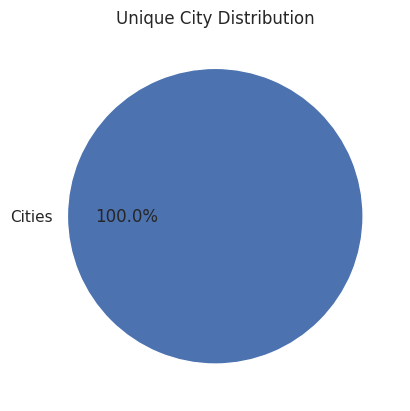

In [20]:
import matplotlib.pyplot as plt

# Counting the unique cities
unique_cities = data['city'].nunique()

# Creating a pie chart
plt.pie([unique_cities], labels=['Cities'], autopct='%1.1f%%')
plt.title('Unique City Distribution')
plt.show()


In [22]:
import pandas as pd

# Counting the number of cities
city_count = data['city'].count()

# Displaying the count in a table format
pd.DataFrame({'City Count': [city_count]})


,City Count
0,146


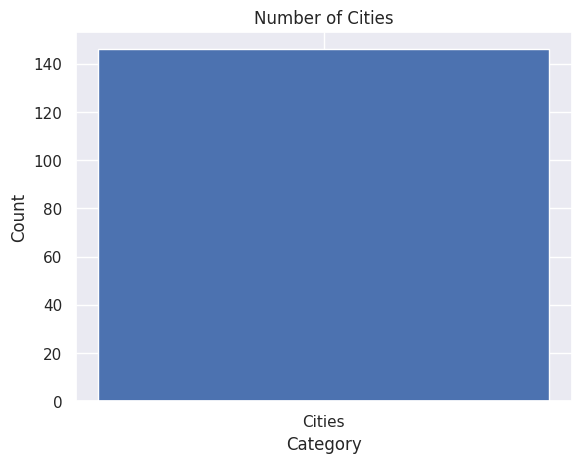

In [23]:
import matplotlib.pyplot as plt

# Counting the number of cities
city_count = data['city'].count()

# Creating a bar chart
plt.bar(['Cities'], [city_count])
plt.title('Number of Cities')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


In [28]:
import pandas as pd

# Selecting relevant columns
selected_data = data[['city', 'admin_name', 'population_total', 'area_land_sq_mi', 'area_total_km2']]

# Grouping by city and admin_name, then selecting average population and areas
averages = selected_data.groupby(['city', 'admin_name'])[
    ['population_total', 'area_land_sq_mi', 'area_total_km2']].mean().reset_index()

# Displaying the averages in a table format
pd.DataFrame(averages).head()


,city,admin_name,population_total,area_land_sq_mi,area_total_km2
0,Abbottabad,Khyber Pakhtunkhwa,148587.0,5.708,14.790
1,Abdul Hakim,Punjab,51494.0,14.228,36.851
2,Aliabad,Gilgit-Baltistan,7273.0,2.700,7.200
3,Alpurai,Khyber Pakhtunkhwa,33351.0,6.497,76.364
4,Athmuqam,Azad Kashmir,153015.0,42.190,109.398


In [27]:
import pandas as pd

# Grouping by city and admin_name
grouped_data = data.groupby(['city', 'admin_name']).size().reset_index(name='counts')

# Displaying the counts in a table format
pd.DataFrame(grouped_data).head()


,city,admin_name,counts
0,Abbottabad,Khyber Pakhtunkhwa,1
1,Abdul Hakim,Punjab,1
2,Aliabad,Gilgit-Baltistan,1
3,Alpurai,Khyber Pakhtunkhwa,1
4,Athmuqam,Azad Kashmir,1


# extracting the data we ar interested in

In [11]:
latitude, longitude = data["latd"], data['longd']
population , area = data['population_total'], data["area_total_km2"]

# to scatter the points, using size and color but without label

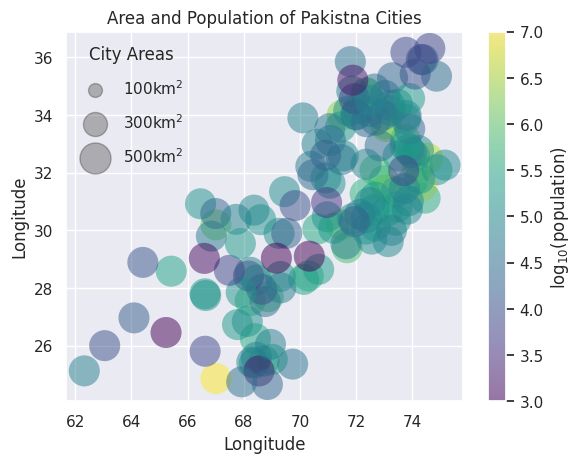

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
plt.scatter(longitude, latitude, label=None, c=np.log10(population),cmap='viridis', s=area, linewidth=0, alpha=0.5)
# plt.axis(aspect='equal')
plt.xlabel('Longitude')
plt.ylabel('Longitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)
# now we will craete a legend, we will plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area, label=str(area) + 'km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Areas')
plt.title("Area and Population of Pakistna Cities")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the dataset
X = data[['area_total_km2']]
y = data['population_total']

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print(f'Mean squared error: {mean_squared_error(y_test, y_pred)}')

# The coefficient of determination: 1 is perfect prediction
print(f'Coefficient of determination (R^2): {r2_score(y_test, y_pred)}')


Coefficients: 
 [5730.57517159]
Mean squared error: 478532124274.635
Coefficient of determination (R^2): -5.388087681587202


In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Create decision tree regressor object
tree_regressor = DecisionTreeRegressor(random_state=42)

# Train the model using the training sets
tree_regressor.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_tree = tree_regressor.predict(X_test)

# Mean absolute error
mae = mean_absolute_error(y_test, y_pred_tree)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 335789.6


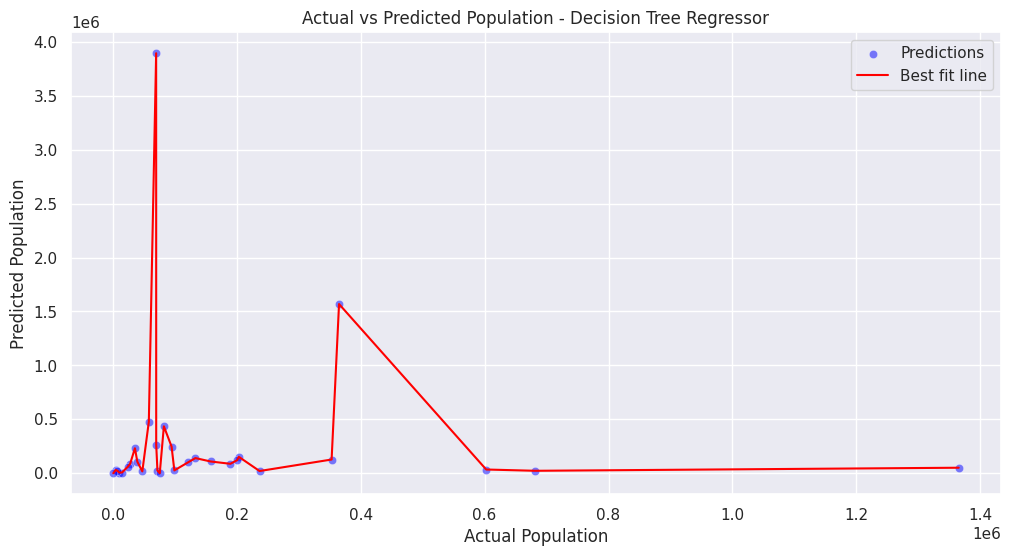

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the actual vs predicted population for Decision Tree Regressor
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred_tree, alpha=0.5, label="Predictions", color="blue")
sns.lineplot(x=y_test, y=y_pred_tree, color="red", label="Best fit line")
plt.title("Actual vs Predicted Population - Decision Tree Regressor")
plt.xlabel("Actual Population")
plt.ylabel("Predicted Population")
plt.legend()
plt.show()


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, X_test, y_train, y_test are already defined

# Create linear regression object
linear_regression = LinearRegression()

# Train the model using the training sets
linear_regression.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_linear = linear_regression.predict(X_test)

# The mean squared error
mse = mean_squared_error(y_test, y_pred_linear)
print(f'Mean Squared Error: {mse}')

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, y_pred_linear)
print(f'R^2 Score: {r2}')


Mean Squared Error: 478532124274.635
R^2 Score: -5.388087681587202


In [30]:
pip install python-pptx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 7.0 MB/s eta 0:00:00


In [31]:
from pptx import Presentation
from pptx.util import Inches

# Initialize a new PowerPoint presentation
prs = Presentation()

# Add a slide with a title and content layout
slide_layout = prs.slide_layouts[1]
slide = prs.slides.add_slide(slide_layout)

# Add a title and content to the slide
title = slide.shapes.title
content = slide.placeholders[1]

title.text = "Project Report: Urbanization Patterns in Pakistan"
content.text = "Introduction\n\nThis project explores the correlation between the geographical area and population of cities in Pakistan."

# Add another slide for requirements
slide_layout = prs.slide_layouts[1]
slide = prs.slides.add_slide(slide_layout)

title = slide.shapes.title
content = slide.placeholders[1]

title.text = "Requirements"
content.text = "- Data Acquisition\n- Data Cleaning\n- EDA\n- Geospatial Mapping\n- Predictive Modeling"

# Continue adding slides for each section of the report
# Example for Technologies Employed
slide_layout = prs.slide_layouts[1]
slide = prs.slides.add_slide(slide_layout)

title = slide.shapes.title
content = slide.placeholders[1]

title.text = "Technologies Employed"
content.text = "Python, Pandas, Matplotlib, Seaborn, Scikit-learn, Google Colab"

# Save the presentation
prs.save('UrbanizationPatternsReport.pptx')


In [33]:
# Ensure you have installed the `python-pptx` package
# If not, run: pip install python-pptx

from pptx import Presentation
from pptx.util import Inches

# Initialize a new PowerPoint presentation
prs = Presentation()

# Add a slide with a title and content layout
slide_layout = prs.slide_layouts[1]
slide = prs.slides.add_slide(slide_layout)

# Add a title and content to the slide
title = slide.shapes.title
content = slide.placeholders[1]

title.text = "Project Report: Urbanization Patterns in Pakistan"
content.text = "Introduction\n\nThis project explores the correlation between the geographical area and population of cities in Pakistan."

# Add another slide for requirements
slide_layout = prs.slide_layouts[1]
slide = prs.slides.add_slide(slide_layout)

title = slide.shapes.title
content = slide.placeholders[1]

title.text = "Requirements"

